# Linear regression homework with Yelp votes

## Introduction

This assignment uses a small subset of the data from Kaggle's [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

- `yelp.json` is the original format of the file. `yelp.csv` contains the same data, in a more convenient format. Both of the files are in this repo, so there is no need to download the data from the Kaggle website.
- Each observation in this dataset is a review of a particular business by a particular user.
- The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
- The "cool" column is the number of "cool" votes this review received from other Yelp users. All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.
- The "useful" and "funny" columns are similar to the "cool" column.

## Task 1

Read `yelp.csv` into a DataFrame.

In [4]:
# access yelp.csv using a relative path
import pandas as pd
yelp = pd.read_csv('data/yelp.csv')
yelp.head(1)

IOError: File ../data/yelp.csv does not exist

## Task 1 (Bonus)

Ignore the `yelp.csv` file, and construct this DataFrame yourself from `yelp.json`. This involves reading the data into Python, decoding the JSON, converting it to a DataFrame, and adding individual columns for each of the vote types.

In [7]:
# read the data from yelp.json into a list of rows
# each row is decoded into a dictionary named "data" using using json.loads()
import json
with open('data/yelp.json', 'rU') as f:
    data = [json.loads(row) for row in f]

In [25]:
# show the first review
print data[1]

{u'votes': {u'funny': 0, u'useful': 0, u'cool': 0}, u'user_id': u'0a2KyEL0d3Yb1V6aivbIuQ', u'review_id': u'IjZ33sJrzXqU-0X6U8NwyA', u'text': u'I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone. They are probably griping about something that their own fault...there are many people like that.\n\nIn any case, my friend and I arrived at about 5:50 PM this past Sunday. It was pretty crowded, more than I thought for a Sunday evening and thought we would have to wait forever to get a seat but they said we\'ll be seated when the girl comes back from seating someone else. We were seated at 5:52 and the waiter came and got our drink orders. Everyone was very pleasant from the host that seated us to the waiter to the server. The prices were very good as well. We placed our orders once we decided what we wanted at 6:02. We shared the baked spaghetti calzone and the small "Here\'s The Beef" pizza so we can both try them. The calzone was h

In [8]:
# convert the list of dictionaries to a DataFrame
import numpy as np
import pandas as pd 


url= 'data/yelp.json'

# read the entire file into a python array
with open(url, 'rb') as f:
    dataS = [json.loads(row) for row in f]

# now, load it into pandas
data_df = pd.DataFrame(dataS)

data_df.head()

,business_id,date,review_id,stars,text,type,user_id,votes
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{u'funny': 0, u'useful': 5, u'cool': 2}"
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,"{u'funny': 0, u'useful': 0, u'cool': 0}"
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,"{u'funny': 0, u'useful': 1, u'cool': 0}"
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,"{u'funny': 0, u'useful': 2, u'cool': 1}"
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,"{u'funny': 0, u'useful': 0, u'cool': 0}"


In [9]:

# add DataFrame columns for cool, useful, and funny
data_df['cool'] =  [row['votes']['cool'] for row in dataS]
data_df['useful'] = [row['votes']['useful'] for row in dataS]
data_df['funny'] = [row['votes']['funny'] for row in dataS]

data_df.head()


,business_id,date,review_id,stars,text,type,user_id,votes,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{u'funny': 0, u'useful': 5, u'cool': 2}",2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,"{u'funny': 0, u'useful': 0, u'cool': 0}",0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,"{u'funny': 0, u'useful': 1, u'cool': 0}",0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,"{u'funny': 0, u'useful': 2, u'cool': 1}",1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,"{u'funny': 0, u'useful': 0, u'cool': 0}",0,0,0


In [10]:
# drop the votes column and then display the head
data_df = data_df.drop('votes', 1) 
data_df.head() 

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


## Task 2

Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.

In [11]:
# treat stars as a categorical variable and look for differences between groups by comparing the means of the groups
data_df.groupby('stars').mean()

,cool,useful,funny
stars,,,
1,0.576769,1.604806,1.056075
2,0.719525,1.563107,0.875944
3,0.788501,1.306639,0.694730
4,0.954623,1.395916,0.670448
5,0.944261,1.381780,0.608631


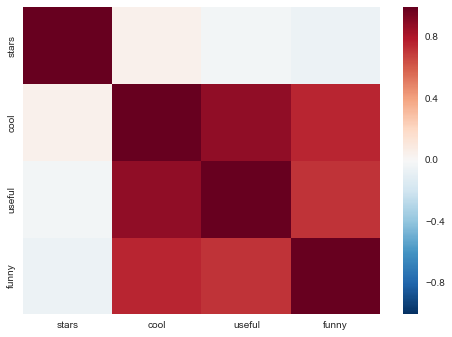

In [12]:
# display acorrelation matrix of the vote types (cool/useful/funny) and stars
%matplotlib inline
import seaborn as sns
sns.heatmap(data_df.corr())

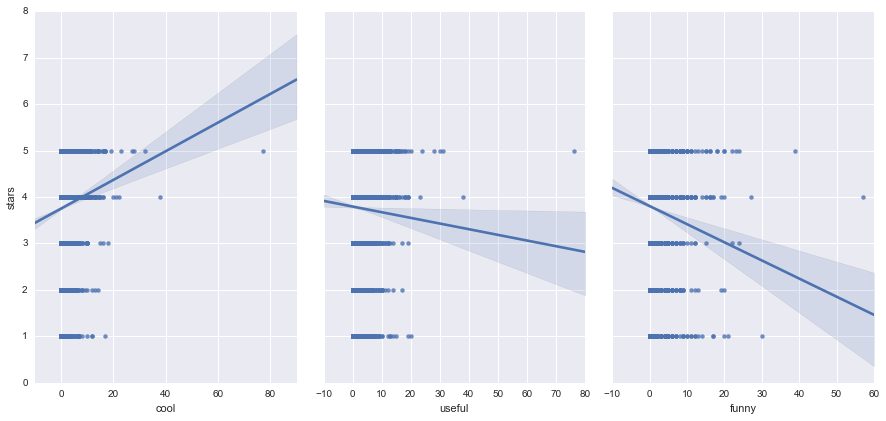

In [13]:
# display multiple scatter plots (cool, useful, funny) with linear regression line

sns.pairplot(data_df, x_vars=['cool', 'useful', 'funny'], y_vars='stars', size=6, aspect=0.7, kind='reg')

## Task 3

Define cool/useful/funny as the feature matrix X, and stars as the response vector y.

In [16]:
feature_cols=['cool', 'useful','funny']
X= data_df[feature_cols]
y = data_df.stars

## Task 4
Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? Explore the Yelp website to see if you detect similar trends.

In [17]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)
zip(feature_cols, linreg.coef_)


[('cool', 0.27435946858853477),
 ('useful', -0.14745239099401289),
 ('funny', -0.1356744905370621)]

## Task 5

Evaluate the model by splitting it into training and testing sets and computing the RMSE. Does the RMSE make intuitive sense to you?

In [18]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import numpy as np


In [19]:
# define a function that accepts a list of features and returns testing RMSE

def train_test_rmse(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))



1.184290528216591

In [ ]:
# calculate RMSE with all three features
train_test_rmse(X, y)

## Task 6

Try removing some of the features and see if the RMSE improves.

In [20]:
feature_cols=['cool','useful']
X=data_df[feature_cols]
y=data_df['stars']
train_test_rmse(X, y)

1.1962390876092979

## Task 7 (Bonus)

Think of some new features you could create from the existing data that might be predictive of the response. Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.

In [ ]:
# new feature: 

In [ ]:
# new features: 


In [ ]:
# add new features to the model and calculate RMSE


## Task 8 (Bonus)

Compare your best RMSE on the testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean response value in the testing set.